In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import importlib
import download_clean_data as dc
import ipca
import metrics
import kernel_regression as kr
import validaton as val
import pickle
importlib.reload(dc) 
importlib.reload(ipca)
importlib.reload(metrics)
importlib.reload(kr)
importlib.reload(val)

<module 'validaton' from '/Users/matteoferrazzi/Documents/GitHub/ML-project-2/validaton.py'>

In [32]:
folder_path = "/Users/matteoferrazzi/Documents/GitHub/ML-project-2/Data/monthly_data"
N = 100
start_date = 20000000
ending_date = 20060000
data, ret = dc.download_clean_data(folder_path, start_date, ending_date,N)

In [14]:
with open('dict_rq.pickle', 'rb') as handle:
    dict_rq = pickle.load(handle)

with open('dict_gaussian.pickle', 'rb') as handle:
    dict_gaussian = pickle.load(handle)

with open('dict_IPCA_reg.pickle', 'rb') as handle:
    dict_IPCA_reg = pickle.load(handle)

In [8]:
def surface_gaussian(dictionary, lambdas1, lambdas2, l):
    
    z = np.zeros((len(lambdas1), len(lambdas2)))
    for l1, lambda1 in enumerate(lambdas1):
        for l2, lambda2 in enumerate(lambdas2):
            for k,v in dictionary.items():
                if k[1] == lambda1 and k[2] == lambda2 and k[3]==l:
                    z[l1, l2] = v
    
    return z

In [13]:
def surface_rq(dictionary, lambdas1, lambdas2, i, j):
    
    z = np.zeros((len(lambdas1), len(lambdas2)))
    for l1, lambda1 in enumerate(lambdas1):
        for l2, lambda2 in enumerate(lambdas2):
            for k,v in dictionary.items():
                if k[1] == lambda1 and k[2] == lambda2 and k[3]==20 and k[4]==20:
                    z[l1, l2] = v
    
    return z

In [6]:
def surface_IPCA(dictionary, lambdas1, lambdas2):
    
    z = np.zeros((len(lambdas1), len(lambdas2)))
    for l1, lambda1 in enumerate(lambdas1):
        for l2, lambda2 in enumerate(lambdas2):
            for k,v in dictionary.items():
                if k[1] == lambda1 and k[2] == lambda2:
                    z[l1, l2] = v
    
    return z

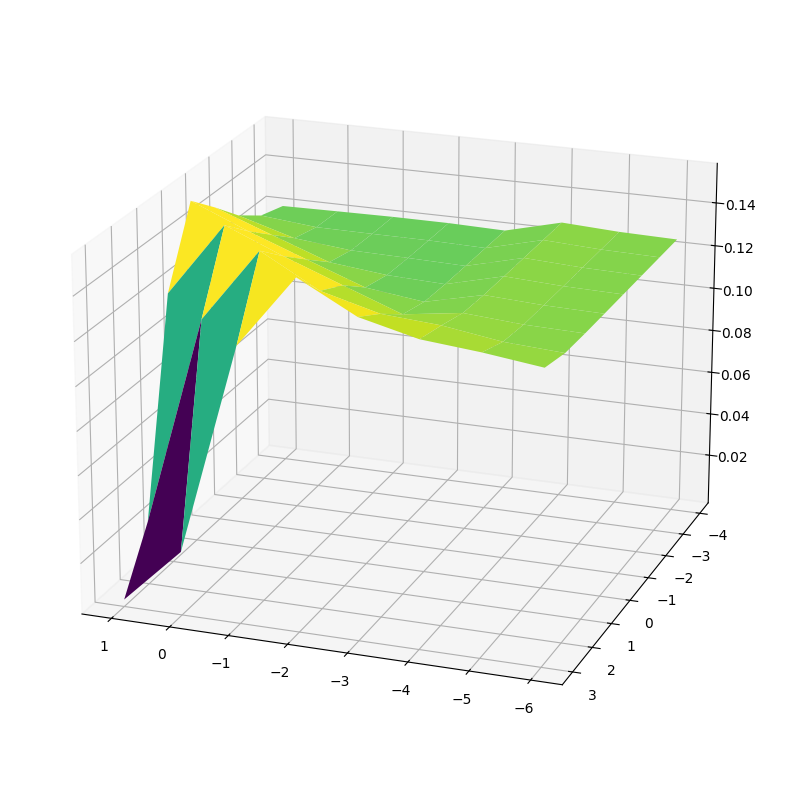

In [7]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(list([10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]), list([1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]))
z = surface_IPCA(dict_IPCA_reg, list([10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]), list([1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]))
ax.plot_surface(np.log10(np.array(x)), np.log10(np.array(y)), np.array(z), cmap='viridis')
ax.view_init(20, 110)

In [17]:
print('The best parameters for IPCA are: ',max(dict_IPCA_reg, key=dict_IPCA_reg.get),'\nCorresponding to a R_squared of: ',max(dict_IPCA_reg.values()))

The best parameters are:  ('IPCA_reg', 0.01, 1000) 
Corresponding to a R_squared of:  0.15511511458083238


In [20]:
print('The best parameters for Gaussian Kernel are: ',max(dict_gaussian, key=dict_gaussian.get),'\nCorresponding to a R_squared of: ',max(dict_gaussian.values()))

The best parameters for Gaussian Kernel are:  ('Gaussian', 0.01, 1, 20) 
Corresponding to a R_squared of:  [0.28629647]


In [21]:
print('The best parameters for Rational Quadratic Kernel are: ',max(dict_rq, key=dict_rq.get),'\nCorresponding to a R_squared of: ',max(dict_rq.values()))

The best parameters for Rational Quadratic Kernel are:  ('Rational Quadratic', 0.01, 1, 20, 20) 
Corresponding to a R_squared of:  [0.285844]


In [11]:
max(dict_rq, key=dict_rq.get)

('Rational Quadratic', 0.01, 1, 20, 20)

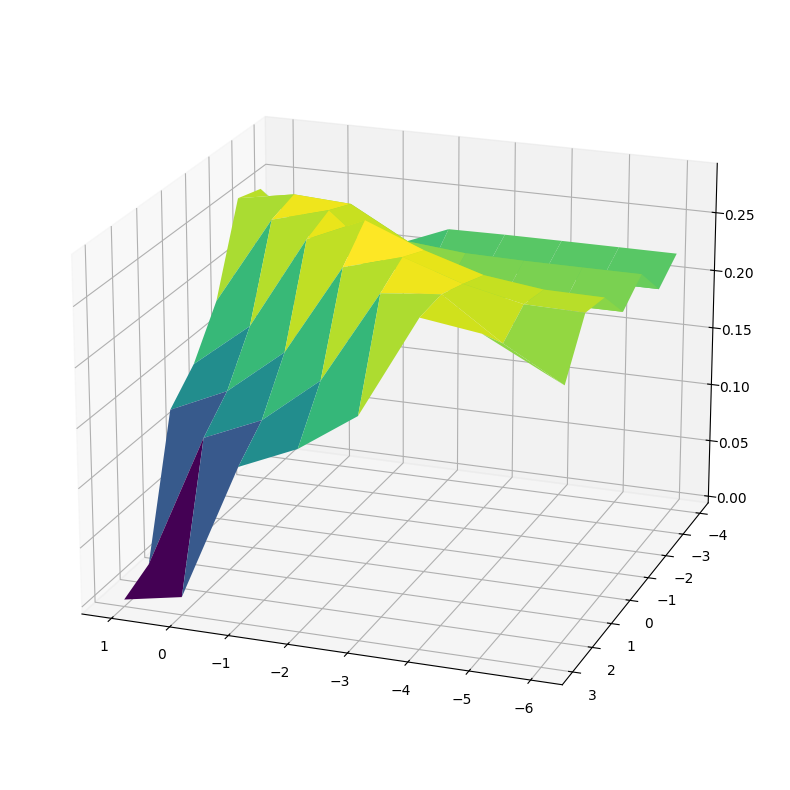

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(list([10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]), list([1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]))
z = surface_gaussian(dict_gaussian, list([10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]), list([1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]), 20)
ax.plot_surface(np.log10(np.array(x)), np.log10(np.array(y)), np.array(z), cmap='viridis')
ax.view_init(20, 110)

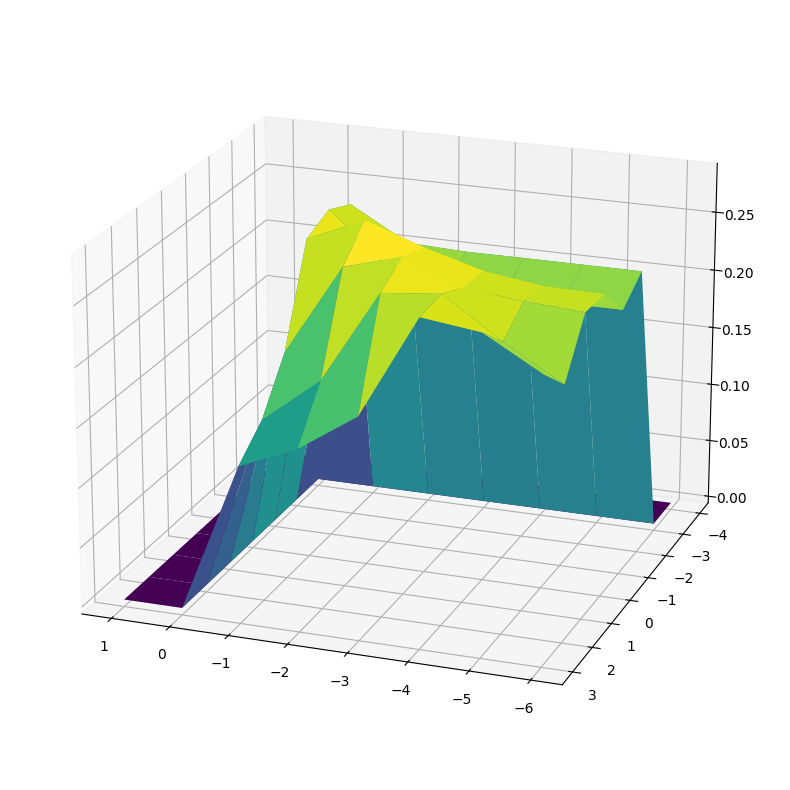

In [15]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(list([10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]), list([1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]))
z = surface_rq(dict_rq, list([10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]), list([1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]), 20, 20)
ax.plot_surface(np.log10(np.array(x)), np.log10(np.array(y)), np.array(z), cmap='viridis')
ax.view_init(20, 110)

In [68]:
k = 5
gamma_first = ipca.gamma_first(ret, data, k)  
max_iter = 100
gamma, f_list = ipca.ipca(data, ret, gamma_first.copy(), max_iter)
print(metrics.total_R_squared(ret, data, gamma, f_list),metrics.pred_R_squared(ret, data, gamma, f_list))
max_iter = 100
W = np.eye(N)
W_list = [W]*(len(data))
lambda1 = 0.1
lambda2 = 0.1
gamma_reg_w, f_list_reg_w = ipca.ipca_reg_w(data, ret, gamma_first.copy(), max_iter, lambda1, lambda2, W_list)
print(metrics.total_R_squared(ret, data, gamma_reg_w, f_list_reg_w),metrics.pred_R_squared(ret, data, gamma_reg_w, f_list_reg_w))

0.366763508734967 0.014516387961327815
0.36379854439329296 0.02303832901126379


In [34]:
data2 = data.copy()
data2 = np.array(np.array(data2).reshape(len(ret)*N,94)) #flatten data, build X
tk = 0
K = kr.K_LR(data2, tk)

_, f_list = ipca.ipca(data, ret, gamma_first.copy(), 1)

lambda1 = 1e-10
lambda2 = 1e-10
Omega1_inv=np.eye((len(data))*N)
Omega2_inv=np.eye(N)
max_iter = 10

f_list_kr, v_kr, Q_kr, _, _ = kr.kernel_regression(data, ret, f_list.copy(), lambda1, lambda2, Omega1_inv, Omega2_inv, max_iter, N, K)

print(metrics.total_R_squared_kr(ret, v_kr, Q_kr))

0
1
2
3
4
5
6
7
8
9
0.36035710801053744


In [70]:
max_iter = 10

In [73]:
lambda1 = 0.1
lambda2 = 0.1

f_list_kr, v_kr, Q_kr, _, _ = kr.kernel_regression(data, ret, f_list.copy(), lambda1, lambda2, Omega1_inv, Omega2_inv, max_iter, N, K)

print(metrics.total_R_squared_kr(ret, v_kr, Q_kr))

0
1
2
3
4
5
6
7
8
9
0.3597967205486119


In [23]:
ipca_r2 = []
ipca_reg_r2 = []
gaussian_r2 = []
rq_r2 = []
k = 5 
trsh = 5/6
W = np.eye(N)
Omega2_inv = np.eye(N)
lambdas1_reg = [0.01]
lambdas2_reg = [1000]
lambdas1 = [0.01]
lambdas2 = [1]
l = [20]
alpha = [20]

for t in np.arange(20000000,20150000, 10000):
    data, ret = dc.download_clean_data(folder_path, t, t+60000, N)
    gamma_first = ipca.gamma_first(ret, data, k) 
    max_iter = 100
    ipca_r2.append(val.val_IPCA(ret, data, trsh, gamma_first, max_iter)['IPCA'])
    W_list = [W]*(len(data))
    ipca_reg_r2.append(val.val_IPCA_reg(ret, data, trsh, lambdas1_reg, lambdas2_reg, gamma_first, max_iter, W_list)[('IPCA_reg', 0.01, 1000)])
    max_iter = 10
    _, f_list = ipca.ipca(data, ret, gamma_first.copy(), 1)
    gaussian_r2.append(val.val_gaussian(ret, data, trsh, lambdas1, lambdas2, l, N, f_list.copy(), Omega2_inv, max_iter)[('Gaussian', 0.01, 1, 20)])
    rq_r2.append(val.val_rq(ret, data, trsh, lambdas1, lambdas2, l, alpha, N, f_list.copy(), Omega2_inv, max_iter)[('Rational Quadratic', 0.01, 1, 20, 20)])

    

done
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
done
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
done
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
done
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
done
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
done
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
done
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
done
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
done
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
done
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
done
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
done
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
done
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
done
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
done
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


In [1]:
plt.plot(np.arange(2006,2021, 1), ipca_r2, label = 'IPCA')
plt.plot(np.arange(2006,2021, 1), ipca_reg_r2, label = 'IPCA_reg')
plt.plot(np.arange(2006,2021, 1), gaussian_r2, label = 'Gaussian')
plt.plot(np.arange(2006,2021, 1), rq_r2, label = 'Rational Quadratic')
plt.xlabel('Year')
plt.ylabel('R_squared')
plt.legend(top_left)

NameError: name 'plt' is not defined